In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
sns.set(style="whitegrid")
path = "../data_cleanup/clean_data.csv"

In [18]:
# 将时间列转换为时间格式,并且按照月份进行排列
def process_time(df):
    df['created_time'] = pd.to_datetime(df['created_at'])
    df['YM'] = df['created_time'].dt.to_period('M').astype(str)

In [19]:
# 作图
# 按列名进行对每个列中数据的整理,计算每个列中出现的个数,并将所有数据展示在一张图上
def show_count_per_month(df, cols):
    plt.figure(figsize=(12, 7))
    for col in cols:
        data = df[df[col] == 1].groupby('YM').size().cumsum().reset_index(name='count')
        sns.lineplot(x='YM', y='count', data=data, marker='o', label=col)
        # 对第一个,中间的点和最后一个点加上准确数值
        for i in [0,int(len(data)/2),len(data) - 1]:
            x = data.loc[i, 'YM']
            y = data.loc[i, 'count']
            plt.text(x, y, str(y), color='black', ha='center')
    plt.title("Cumulative Count per Month")
    plt.xlabel('Year-Month')
    plt.ylabel('Cumulative Count')
    plt.xticks(rotation=45)
    plt.legend(title='Series')
    plt.tight_layout()
    plt.show()

In [20]:
# 作图
# 按列名进行对每个列中数据的整理,计算每个列中出现的个数,再将对应的下载数量进行求和,并将所有数据展示在一张图上
def show_sum_per_month(df, cols):
    plt.figure(figsize=(12, 7))
    for col in cols:
        data = df[df[col] == 1].groupby('YM')['downloads'].sum().cumsum().reset_index(name='sum')
        sns.lineplot(x='YM', y='sum', data=data, marker='o', label=col)
        # 标记第一个和最后一个点
        for i in [0,int(len(data)/2),len(data) - 1]:
            x = data.loc[i, 'YM']
            y = data.loc[i, 'sum']
            plt.text(x, y, str(y), color='black', ha='center')
    plt.title("Cumulative Sum per Month")
    plt.xlabel('Year-Month')
    plt.ylabel('Cumulative Sum')
    plt.xticks(rotation=45)
    plt.legend(title='Series')
    plt.tight_layout()
    plt.show()

In [21]:
# 对统计数据进行单列的作图,并将所有图展示在一张图片上
def show_count_per_month_subplot(df, cols):
    n = len(cols)
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 5), dpi=100)  # 增大清晰度

    for idx, col in enumerate(cols):
        ax = axes[idx]  # 获取当前子图的轴
        data = df[df[col] == 1].groupby('YM').size().cumsum().reset_index(name='count')
        sns.lineplot(x='YM', y='count', data=data, marker='o', ax=ax)
        ax.set_title(col)
        ax.set_xlabel('Year-Month')
        ax.set_ylabel('Cumulative Count')
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [22]:
def show_sum_per_month_subplot(df, cols):
    n = len(cols)
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 5), dpi=100)  # 增大宽度和DPI

    for idx, col in enumerate(cols):
        ax = axes[idx]  # 获取当前子图的轴
        data = df[df[col] == 1].groupby('YM')['downloads'].sum().cumsum().reset_index(name='sum')
        sns.lineplot(x='YM', y='sum', data=data, marker='o', ax=ax)
        ax.set_title(col)
        ax.set_xlabel('Year-Month')
        ax.set_ylabel('Cumulative Sum')
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [23]:
# 对基础模型进行处理,计算出每个模型的数量,并建立 one-hot 编码
def analyse_base_model(df):
    bm = df['base_models'].value_counts()
    print(len(bm))
    models_name = bm.index.tolist()
    models_nb = bm.values.tolist()
    print(len(models_name))
    bms = ['distilbert', 'xlm-roberta', 'roberta','bert', 'llama', 'gpt2', 'mistral', 'timm', 't5', 'marian', 'bart', 'whisper','gpt3']
    bmm = [[] for i in bms]
    nbbm = [0 for i in bms]
    for i in range(len(models_name)):
        ll = models_name[i].split(',')
        for j in ll:
            for m in range(len(bms)):
                if bms[m] in j:
                    bmm[m].append(i)
                    break
    # print(bmm)
    for i in range(len(bmm)):
        for j in range(len(bmm[i])):
            nbbm[i] += models_nb[j]
    print(nbbm)
    base_models_dict = {}
    for i,j in zip(bms,nbbm):
        base_models_dict[i] = j
    base_models_dict = dict(sorted(base_models_dict.items(),key = lambda x:x[1]))
    plt.bar(base_models_dict.keys(),base_models_dict.values())
    plt.xticks(rotation=25)
    plt.show()
    return base_models_dict

In [24]:
def analyse_cols(df,cols):
    show_count_per_month(df, cols)
    show_count_per_month_subplot(df,cols)
    show_sum_per_month(df, cols)
    show_sum_per_month_subplot(df,cols)

In [25]:
df = pd.read_csv(path)
process_time(df)

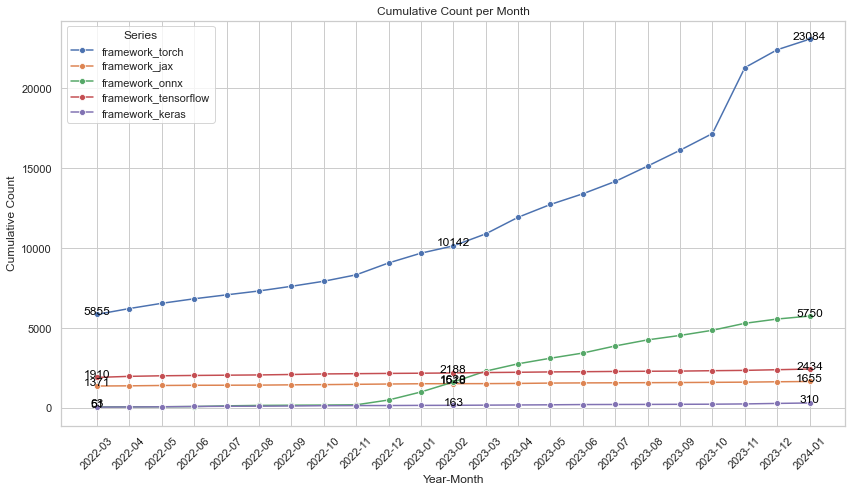

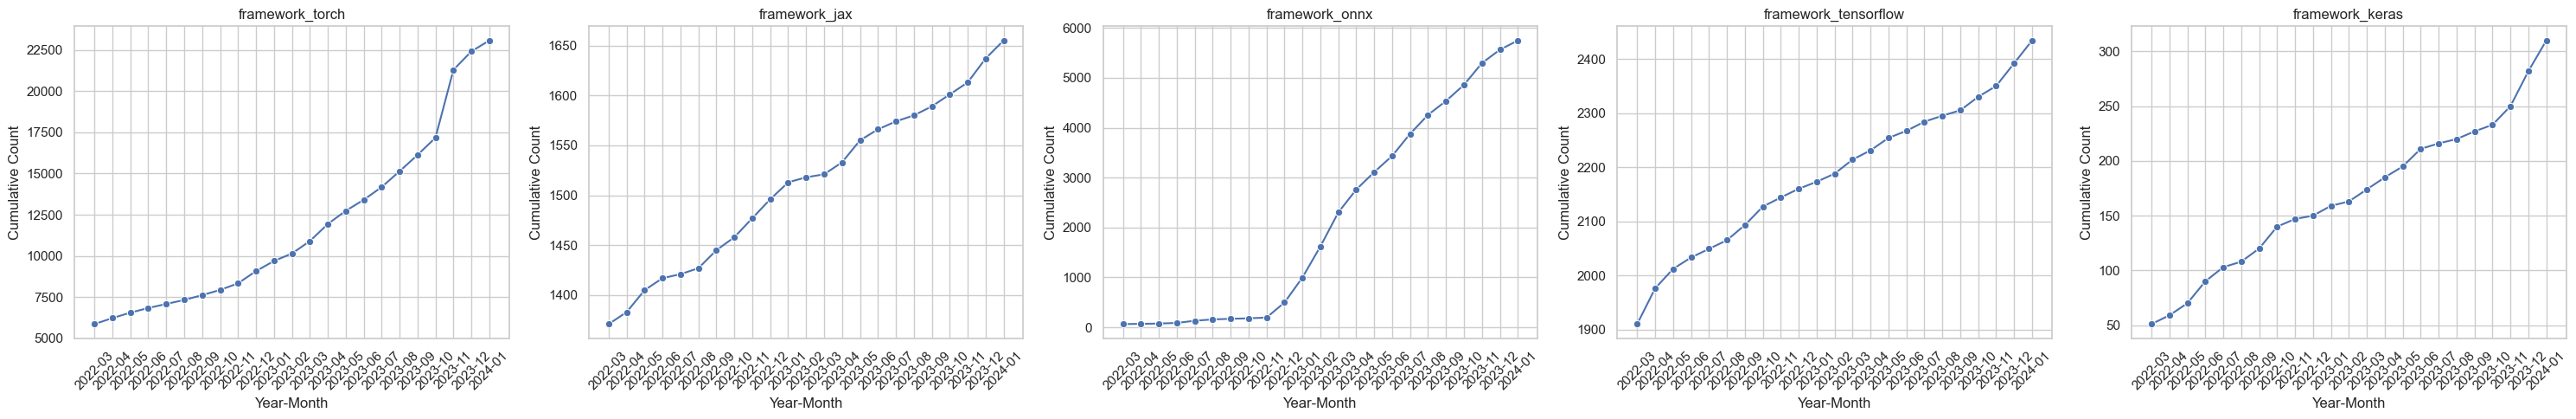

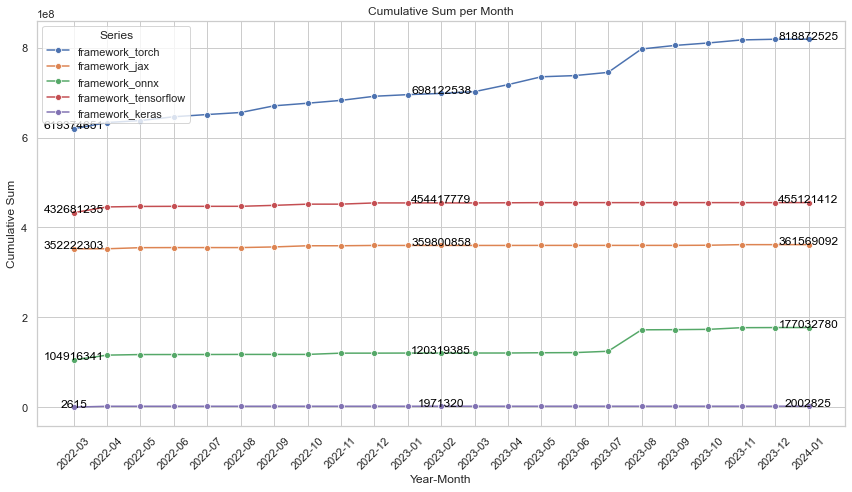

In [ ]:
col_frameworks = ['framework_torch','framework_jax', 'framework_onnx', 'framework_tensorflow','framework_keras']
analyse_cols(df,col_frameworks)

In [ ]:
col_ONEHOT = ['ONEHOT_endpoints_compatible', 'ONEHOT_autotrain_compatible','ONEHOT_safetensors', 'ONEHOT_tensorboard', 'ONEHOT_has_space']
analyse_cols(df,col_ONEHOT)

In [ ]:
col_lang = ['NB_Lang','NB_en','NB_fr', 'NB_zh', 'NB_ar', 'NB_de', 'NB_es']
analyse_cols(df,col_lang)

In [ ]:
df = pd.read_csv(path)
bmd = analyse_base_model(df)
cols = ['created_at', 'downloads', 'likes','base_models']
df = df[cols]
process_time(df)
bms = ['distilbert', 'xlm-roberta', 'roberta','bert', 'llama', 'gpt2', 'mistral', 'timm', 't5', 'marian', 'bart', 'whisper','gpt3']
for i in bms:
    df[i] = 0
for i in range(len(df)):
    bm_content = df.iloc[i,3]

    if type(bm_content) != str :
        continue
    ll = bm_content.split(',')
    for l in ll:
        for j in range(len(bms)):
            if bms[j] in l:
                df.loc[i,bms[j]] = 1
                break

analyse_cols(df,bms)